In [1]:
!pip install -q -r requirements.txt

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

### 1. Loading and Exploring Data

In [3]:
df = pd.read_csv('data/processed/ChurnModelling_Final.csv')
df.head(15)

,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenureBins,gender_Female,gender_Male,...,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneServiceBins,InternetServiceBins
0,0,1,0,1,-1.160323,-0.992611,False,0,True,False,...,False,True,False,False,False,False,True,False,0,2
1,0,0,0,0,-0.259629,-0.172165,False,3,False,True,...,False,False,True,False,False,False,False,True,1,3
2,0,0,0,1,-0.362660,-0.958066,True,0,False,True,...,False,True,False,False,False,False,False,True,1,3
3,0,0,0,0,-0.746535,-0.193672,False,3,False,True,...,False,False,True,False,True,False,False,False,0,4
4,0,0,0,1,0.197365,-0.938874,True,0,True,False,...,False,True,False,False,False,False,True,False,1,1
5,0,0,0,1,1.159546,-0.643789,True,0,True,False,...,False,True,False,False,False,False,True,False,2,4
6,0,0,1,1,0.808907,-0.145738,False,1,False,True,...,False,True,False,False,False,True,False,False,2,3
7,0,0,0,0,-1.163647,-0.872587,False,0,True,False,...,False,True,False,False,False,False,False,True,0,2
8,0,1,0,1,1.330711,0.338085,True,3,True,False,...,False,True,False,False,False,False,True,False,2,5
9,0,0,1,0,-0.286218,0.533044,False,4,False,True,...,False,False,True,False,True,False,False,False,1,3


In [4]:
df.isnull().sum()

SeniorCitizen                              0
Partner                                    0
Dependents                                 0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
tenureBins                                 0
gender_Female                              0
gender_Male                                0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
PhoneServiceBins                           0
InternetServiceBins                        0
dtype: int

### 3. Handle Class Imbalance

In [5]:
X = df.drop(columns=['Churn'])
Y = df['Churn']

In [6]:
"""
chrun - 1000
non-churn - 9000

upsample - (churn) 1000 -> 9000
downsamping - (non-churn) 9000 -> 1000
"""
X_train, X_test, Y_train, Y_test = train_test_split(
                                                    X, Y,
                                                    test_size=0.2,
                                                    random_state=42
)


In [7]:
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

Text(0, 0.5, 'Count')

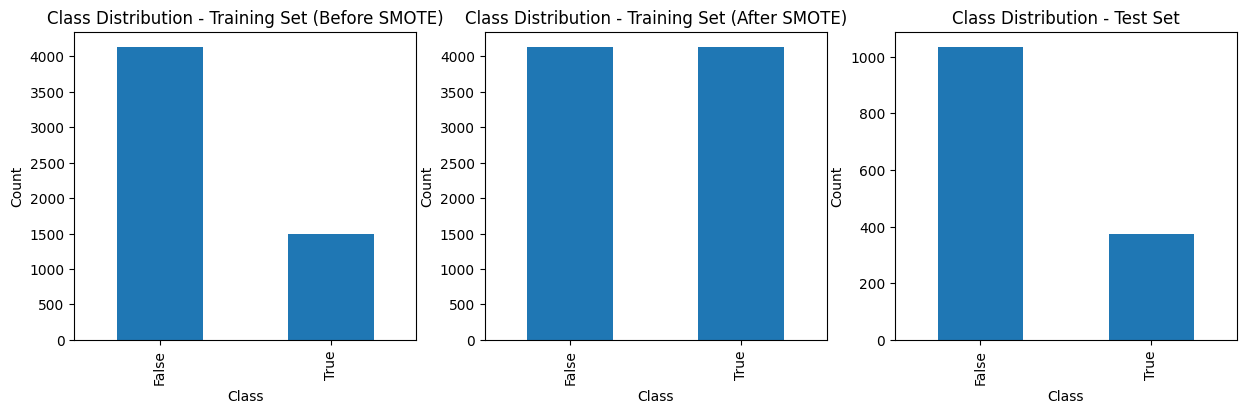

In [8]:
plt.figure(figsize=(15, 4))

# Before SMOTE
plt.subplot(131)
Y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution - Training Set (Before SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')

# After SMOTE
plt.subplot(132)
Y_train_resampled.value_counts().plot(kind='bar')
plt.title('Class Distribution - Training Set (After SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')

# Test Set
plt.subplot(133)
Y_test.value_counts().plot(kind='bar')
plt.title('Class Distribution - Test Set')
plt.xlabel('Class')
plt.ylabel('Count')

In [11]:
# Convert object/bool columns to numeric
X_train_resampled = X_train_resampled.astype(float)
Y_train_resampled = Y_train_resampled.astype(int)
X_test  = X_test.astype(float)
Y_test  = Y_test.astype(int)

# Save
np.savez('artifacts/X_train.npz', X_train_resampled)
np.savez('artifacts/Y_train.npz', Y_train_resampled)
np.savez('artifacts/X_test.npz', X_test)
np.savez('artifacts/Y_test.npz', Y_test)
